<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/eGFR_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')
print(lab.shape)
print(hemo.shape)

(21641523, 11)
(149987, 5)


In [3]:
lab.sort_values('CWhen')

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
3797950,1,446648,1839345,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,Plt smear,2557-12-01 06:55:29.080,NaN,Adequate,NaN,NaN
3797939,1,446648,1839345,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,EO%,2557-12-01 06:55:29.080,NaN,003.6,%,NaN
3797940,1,446648,1839345,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,HCT,2557-12-01 06:55:29.080,NaN,32.5,%,NaN
3797941,1,446648,1839345,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,Hypochro,2557-12-01 06:55:29.080,NaN,1+,NaN,NaN
3797944,1,446648,1839345,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,MCH,2557-12-01 06:55:29.080,NaN,32.3,pg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2179946,1,171588,10574616,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,PHOSPHORUS,"PHOSPHORUS, 32109",2566-04-10 16:29:34.003,NaN,4.9,mg/dL,2.7-4.5
11770242,1,1845798,10564519,ห้องปฏิบัติการภาควิชาพยาธิวิทยา,ชิ้นเนื้อเล็กไม่เกิน 2 ซม.,NaN,2566-04-10 16:33:02.827,NaN,FT,NaN,NaN
4468199,1,565443,10572514,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,DIRECT BILIRUBIN,"DIRECT BILIRUBIN, 32207",2566-04-10 16:33:58.130,NaN,0.1,mg/dL,0-0.5
4468198,1,565443,10572514,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE IN RANDOM URINE,"CREATININE IN RANDOM URINE, 34101",2566-04-10 16:33:59.003,NaN,27.8,mg/dL,40-278


In [4]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()

In [5]:
# Remove patient UIDs from lab['PatientUID'] that are in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

##**🗂️ Patient Data eGFR age >= 18**




In [6]:
# Define the values to match
result_item_names = ['eGFR(CKD-EPI) age >=18']

# Select rows where 'ResultItemName' matches the specified values
eGFR = lab[lab['ResultItemName'].isin(result_item_names)]
eGFR
labeGFR = eGFR[['LabNo','PatientUID', 'PatientVisitUID', 'ResultItemName', 'ResultValue', 'CWhen']]
labeGFR

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
248,1,2299,3386255,eGFR(CKD-EPI) age >=18,71.7,2559-08-15 09:51:54.913
255,1,2299,3640924,eGFR(CKD-EPI) age >=18,66.8,2559-11-11 09:40:06.053
271,1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2560-03-31 10:18:54.363
286,1,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2560-07-05 10:40:40.763
331,1,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2560-10-03 09:19:54.710
...,...,...,...,...,...,...
21628049,159,925649,3617725,eGFR(CKD-EPI) age >=18,77.60,2560-04-17 08:54:35.740
21628297,160,925649,3617725,eGFR(CKD-EPI) age >=18,72.00,2560-04-19 08:41:45.060
21628538,161,925649,3617725,eGFR(CKD-EPI) age >=18,62.90,2560-04-21 08:47:03.167
21628775,162,925649,3617725,eGFR(CKD-EPI) age >=18,59.60,2560-04-24 08:59:53.310


> 📌 **See Not Use Result Value**


    eGFR that are not digits and decimal
    there are Not Detect / Cancel etc.

In [7]:
import re
# Define the regular expression pattern for valid values (digits and decimals)
pattern = r'^[0-9]+(\.[0-9]+)?$'

# Filter rows with non-digit or non-decimal values in the 'ResultValue' column
non_digit_rows = labeGFR[~labeGFR['ResultValue'].astype(str).apply(lambda x: bool(re.match(pattern, x)))]
non_digit_rows[:5]  #51 rows have eGFR as Not Deteched

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
1330622,1,119514,3571540,eGFR(CKD-EPI) age >=18,ND,2559-10-18 20:48:28.817
4453496,1,563983,3804017,eGFR(CKD-EPI) age >=18,-,2560-01-12 13:04:14.380
4471358,1,566187,8235036,eGFR(CKD-EPI) age >=18,Not detected,2564-03-19 09:09:07.297
6486667,1,871360,4278938,eGFR(CKD-EPI) age >=18,nd,2560-07-03 15:04:50.793
9528830,1,1269185,6082408,eGFR(CKD-EPI) age >=18,cancel,2562-03-13 09:40:29.180


In [8]:
# Convert ResultValue to numeric, forcing errors to NaN
labeGFR['ResultValue'] = pd.to_numeric(labeGFR['ResultValue'], errors='coerce')
labeGFR_cleaned = labeGFR.dropna(subset=['ResultValue'])
#labeGFR_cleaned.reset_index(drop=True, inplace=True)
labeGFR_cleaned

<ipython-input-8-1f6ab6eac94a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeGFR['ResultValue'] = pd.to_numeric(labeGFR['ResultValue'], errors='coerce')


,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
248,1,2299,3386255,eGFR(CKD-EPI) age >=18,71.7,2559-08-15 09:51:54.913
255,1,2299,3640924,eGFR(CKD-EPI) age >=18,66.8,2559-11-11 09:40:06.053
271,1,2299,4020970,eGFR(CKD-EPI) age >=18,67.2,2560-03-31 10:18:54.363
286,1,2299,4286612,eGFR(CKD-EPI) age >=18,69.2,2560-07-05 10:40:40.763
331,1,2299,4546471,eGFR(CKD-EPI) age >=18,63.6,2560-10-03 09:19:54.710
...,...,...,...,...,...,...
21628049,159,925649,3617725,eGFR(CKD-EPI) age >=18,77.6,2560-04-17 08:54:35.740
21628297,160,925649,3617725,eGFR(CKD-EPI) age >=18,72.0,2560-04-19 08:41:45.060
21628538,161,925649,3617725,eGFR(CKD-EPI) age >=18,62.9,2560-04-21 08:47:03.167
21628775,162,925649,3617725,eGFR(CKD-EPI) age >=18,59.6,2560-04-24 08:59:53.310


In [9]:
import pandas as pd

# Assuming you have a DataFrame named 'eGFR' with the specified columns
pivot_table = pd.pivot_table(labeGFR_cleaned, index=['PatientUID', 'PatientVisitUID'], values=['ResultItemName', 'ResultValue', 'CWhen'], aggfunc='first')
pivot_table

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3386255          2559-08-15 09:51:54.913  eGFR(CKD-EPI) age >=18   
           3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10312896         2566-01-30 16:16:45.013  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10191122         2565-12-26 09:29:11.307  eGFR(CKD-EPI) age >=18   
           10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                            ResultValue  
PatientUID PatientVisitUID               
2299       3386255                71.70  
           3640924                66.80  
           4020970                67.20  
           4286612                69.20  
           4546471                63.60  
...                                 ...  
3432056    10312896               72.86  
           10408954               68.69  
           10573233               45.08  
3437526    10191122               55.94  
           10541118               56.99  

[318675 rows x 3 columns]

In [10]:
pivot_table.isnull().any()

CWhen             False
ResultItemName    False
ResultValue       False
dtype: bool

In [11]:
print(labeGFR_cleaned['PatientUID'].nunique()) #มีผู้ป่วย 20967 ที่ไม่ฟอกไต เป็นผู้ป่วยที่เราจะใช้
print(labeGFR_cleaned['PatientVisitUID'].nunique()) #visit unique 318675

20967
318675


##  **🕑 Generate datetime**
    Split CWhen เพราะต้องการ generate year as คศ. Pandas มี outbound
    ให้อยู่ในระยะเวลาของ คศ. แต่ลอง convert column 'CWhen'
    เป็น datetime แล้วทำไม่ได้เลยต้อง split แล้วค่อย merge

In [12]:
import pandas as pd

df = pd.DataFrame(pivot_table)

# Splitting the 'time' column into separate columns
df[['date', 'timestamp']] = df['CWhen'].str.split(' ', expand=True)
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df[['hour', 'minute', 'second']] = df['timestamp'].str.split(':', expand=True)
df[['second', 'nanosecond']] = df['second'].str.split('.', expand=True)

# Convert year column from BE to AD
df['year'] = df['year'].astype(int) - 543

# Combine columns into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day',]])
# Convert timestamp to Timedelta
df['timestamp'] = pd.to_timedelta(df['timestamp'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Merge timestamp and date columns
df['datetime'] = df['date'] + df['timestamp']

df_sorted = df.sort_values(by=['PatientUID', 'datetime'])
df_sorted.isnull().any()

CWhen             False
ResultItemName    False
ResultValue       False
date              False
timestamp         False
year              False
month             False
day               False
hour              False
minute            False
second            False
nanosecond        False
datetime          False
dtype: bool

In [13]:
df_sorted = df_sorted[['CWhen','ResultItemName','ResultValue','date','datetime']] #eGFR ทั้งหมดมี 318686 rows
df_sorted_reset = df_sorted.reset_index()
df_final = df_sorted_reset.copy()

In [14]:
df_final

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15,2016-08-15 09:51:54.913
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11,2016-11-11 09:40:06.053
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31,2017-03-31 10:18:54.363
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710
...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30,2023-01-30 16:16:45.013
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24,2023-02-24 21:05:12.747
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10,2023-04-10 09:51:32.587
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26,2022-12-26 09:29:11.307


## **🕴PreviousDateTime**

`การมา visit ครั้งก่อนหน้า`

In [15]:
df_final['PreviousDateTime'] = df_final['datetime'].shift(1)
df_final

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime,PreviousDateTime
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15,2016-08-15 09:51:54.913,NaT
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763
...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587


In [17]:
df_final.isnull().sum()

PatientUID          0
PatientVisitUID     0
CWhen               0
ResultItemName      0
ResultValue         0
date                0
datetime            0
PreviousDateTime    1
dtype: int64

## **plot slope by eGFR**

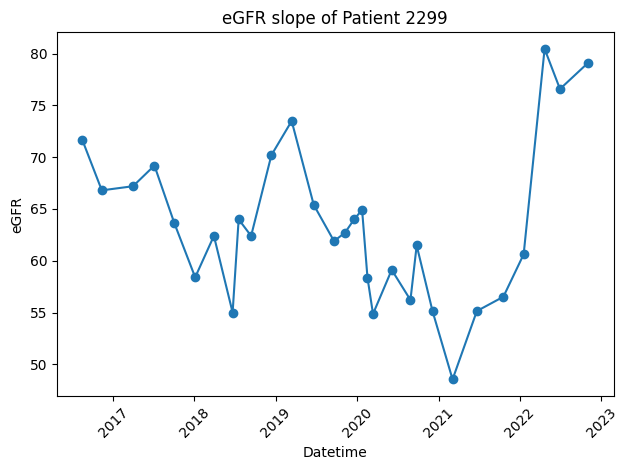

In [27]:
import matplotlib.pyplot as plt

# Filter the DataFrame for PatientUID 2299
patient_2299 = df_final[df_final['PatientUID'] == 2299][['ResultValue', 'datetime']]

# Plot the data
plt.plot(patient_2299['datetime'], patient_2299['ResultValue'], marker='o')
plt.xlabel('Datetime')
plt.ylabel('eGFR')
plt.title('eGFR slope of Patient 2299')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

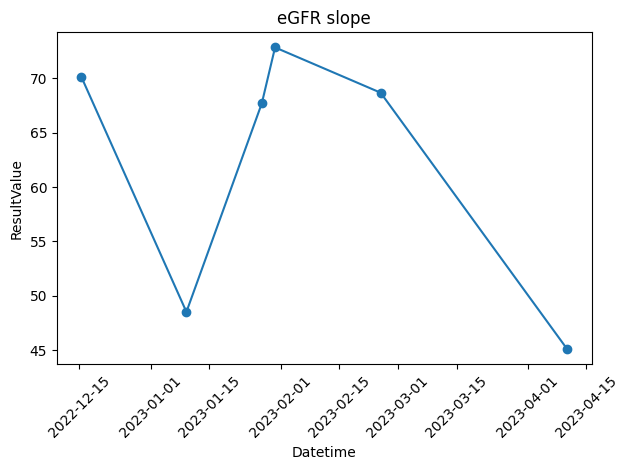

In [28]:
import matplotlib.pyplot as plt
patient = df_final[df_final['PatientUID'] == 3432056][['ResultValue', 'datetime']]

# Plot the data
plt.plot(patient['datetime'], patient['ResultValue'], marker='o')
plt.xlabel('Datetime')
plt.ylabel('ResultValue')
plt.title('eGFR slope')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

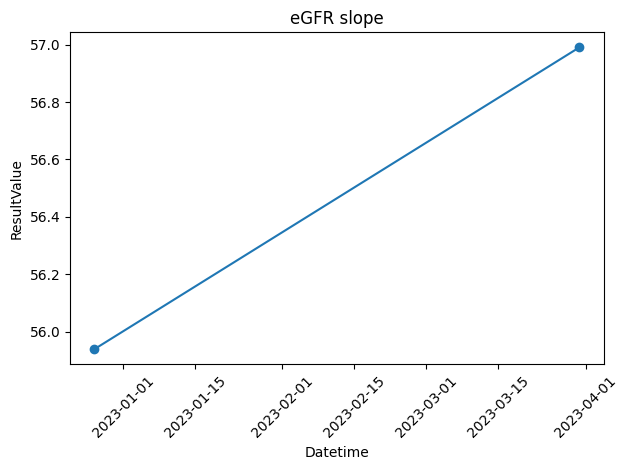

In [29]:
import matplotlib.pyplot as plt
patient = df_final[df_final['PatientUID'] == 3437526][['ResultValue', 'datetime']]

# Plot the data
plt.plot(patient['datetime'], patient['ResultValue'], marker='o')
plt.xlabel('Datetime')
plt.ylabel('ResultValue')
plt.title('eGFR slope')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ขั้นตอนต่อไป จะต้องทำตาราง **wide table** ซึ่งประกอบด้วย 5 ไฟล์
```
1. lab >> ค่าแลปที่แต่ละ visit ได้ตรวจ
2. drug >> ระยเวลาการรับยา (drug duration) ที่แต่ละ visit ได้รับ
3. diag >> จำนวนการมารับการวินิจฉัย
4. vital >> bmi bsa
5. visit >> ข้อมูลสัญชาติ อายุ
```

In [32]:
df_final.to_csv('/content/drive/MyDrive/kidney/GFR.csv')